In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
from Image_Processing import Processing
from sudoku_block import find_block
import Block_Manipulate
from Model_Prediction import Predd
import sudoku_solver
import return_image

In [26]:
def puzzle_solved(Image):
    img = np.copy(Image)              # duplicate of Image
    processed_img = Processing(img)    # Preprocessing Image
    corners = find_block(processed_img,img)  # Find Corners from the Image
    if len(corners):
        block_img = Block_Manipulate.warp(corners,img)    # extract the sudoku block from the Image
        processed_block = Processing(block_img)           # Preprocessing Sudoku Block
        vertical_lines, horizontal_lines = Block_Manipulate.row_col_line(processed_block)   # Extracting Vertical & Horizontal lines 
        mask = Block_Manipulate.create_mask(vertical_lines, horizontal_lines)   # Creating a Grid
        numbers = cv2.bitwise_and(processed_block, mask)              # Eliminate grid from Processed Block Image
        indvidual_numbers = Block_Manipulate.individual_square(numbers)   # Get Individual Block   i.e  9*9 => 81 blocks
        unsolved_puzzle = Predd(indvidual_numbers)            # Predict individual block to create Sudoku array
        puzzle = np.copy(unsolved_puzzle)                # copy of Sudoku array
        is_solve = sudoku_solver.solver(puzzle,0,0)      # Solve the Sudoku array
        if is_solve:
            return_image.draw_digits_on_warped(block_img,puzzle,unsolved_puzzle)   # add numb
            img = return_image.unwarp_image(block_img,img,corners)
        else:
            print('failed to get solution')
        return img
    else:
        print('could\'nt register the corners ')
        return img

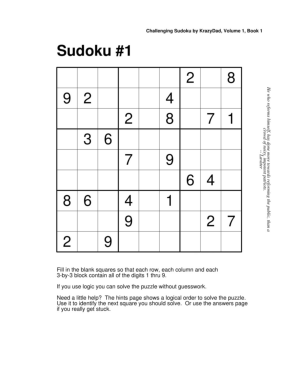

In [23]:
Image = cv2.imread('NN_data/Sudoku.jpg')
plt.imshow(Image)
plt.axis('off')
plt.show()

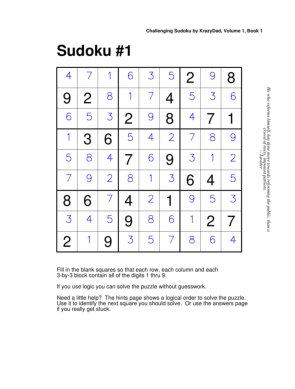

In [25]:
Solve = puzzle_solved(Image)
plt.imshow(Solve)
plt.axis('off')
plt.show()

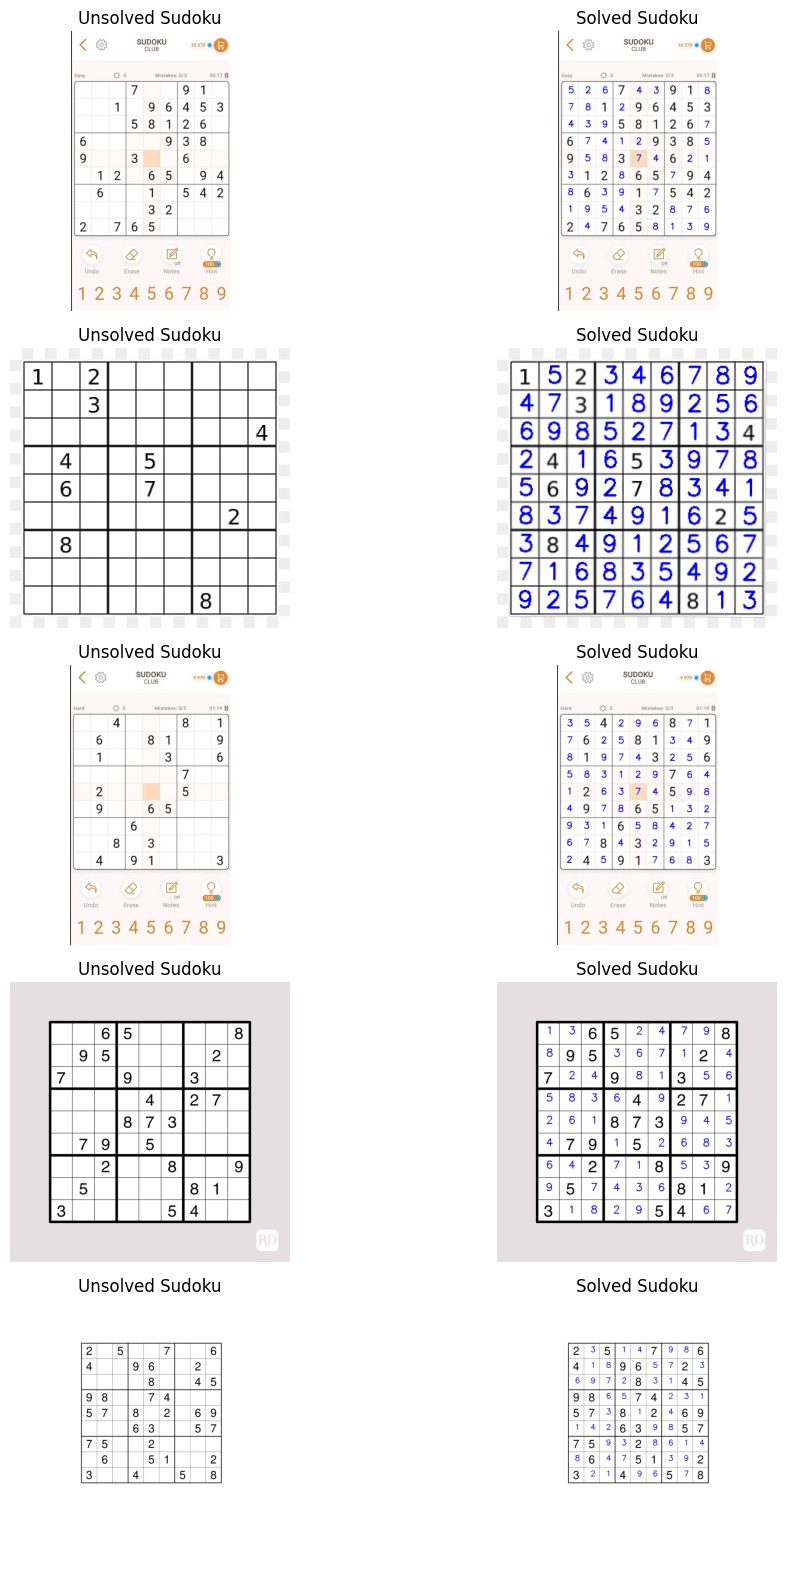

In [12]:
fig,axes = plt.subplots(5,2,figsize=(12,16))
Images = ['Snew7.jpeg','Snew1.jpeg','Snew6.jpeg','Snew5.jpeg','1.jpg']
font_size = [1,1,1,2,2]
width = [2,2,2,3,3]
axs = axes.ravel()
ax = 0

for i,image in enumerate(Images):
    image_path = os.path.join('NN_data',image)
    img = cv2.imread(image_path)
    solved_img = puzzle_solved(img,font_size[i],width[i])
    xaxis = ax + i
    yaxis = xaxis + 1
    axs[xaxis].imshow(img)
    axs[xaxis].axis('off')
    axs[xaxis].set_title('Unsolved Sudoku')
    axs[yaxis].imshow(solved_img)
    axs[yaxis].axis('off')
    axs[yaxis].set_title('Solved Sudoku')
    ax = ax + 1
    
plt.tight_layout()
plt.show()
# image = cv2.imread('NN_data/Snew5.jpeg')
# puzzle_solved(image)